# Data analysis for the 'Iron and Steel' dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import networkx as nx


## Data Collection

In [2]:
# the column names are "Export_country", "Import_country", "Month", "Year", "Nominal Value (SUM)", "Tons (SUM)"

### on the Value

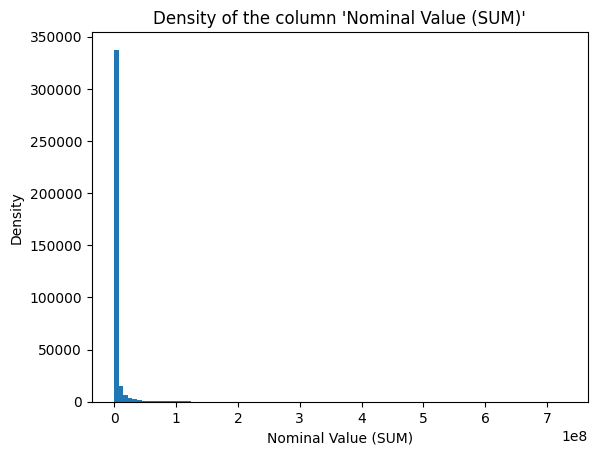

The skewness of the column 'Nominal Value (SUM)' is 10.36592910527056
The skewness of the column 'Nominal Value (SUM)' after box-cox transformation is -0.007482586913659033


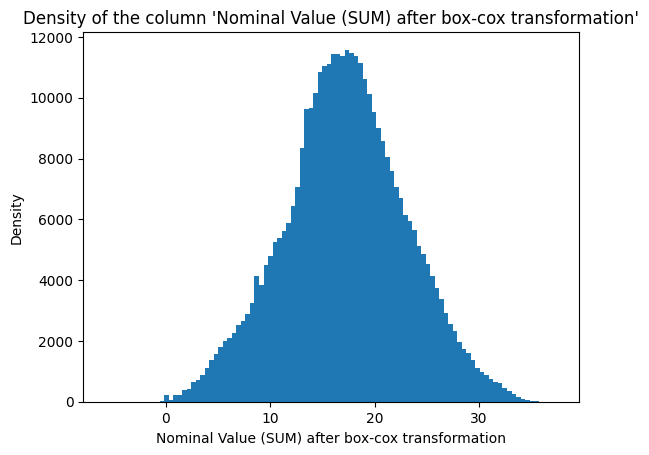

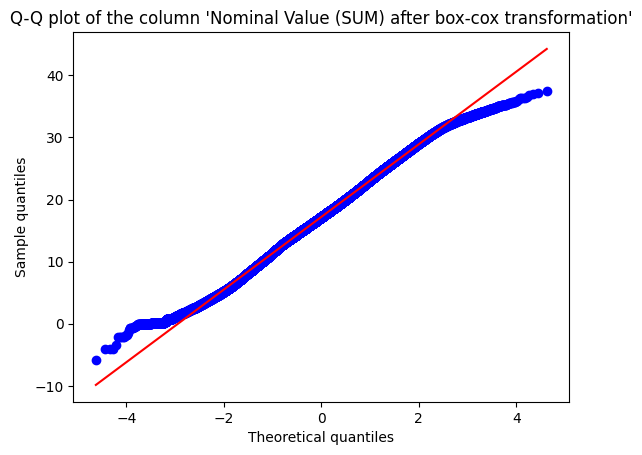

The K-S statistic of the column 'Nominal Value (SUM) after box-cox transformation' is 0.011962764292433453
The p-value of the K-S test of the column 'Nominal Value (SUM) after box-cox transformation' is 9.802594076230484e-47


In [3]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# plot the density of the column "Nominal Value (SUM)" in histogram
df["Nominal Value (SUM)"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Nominal Value (SUM)'")
plt.xlabel("Nominal Value (SUM)")
plt.ylabel("Density")
plt.show()

# do box-cox transformation on the column "Nominal Value (SUM)" in the new column "Nominal Value (SUM) after box-cox transformation"
df["Nominal Value (SUM) after box-cox transformation"], lambdaForNominalValue = stats.boxcox(df["Nominal Value (SUM)"])
print("The skewness of the column 'Nominal Value (SUM)' is", df["Nominal Value (SUM)"].skew())
print("The skewness of the column 'Nominal Value (SUM)' after box-cox transformation is", df["Nominal Value (SUM) after box-cox transformation"].skew())

# plot the density of the column "Nominal Value (SUM) after box-cox transformation" in histogram
df["Nominal Value (SUM) after box-cox transformation"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Nominal Value (SUM) after box-cox transformation'")
plt.xlabel("Nominal Value (SUM) after box-cox transformation")
plt.ylabel("Density")
plt.show()

# plot the Q-Q plot of the column "Nominal Value (SUM) after box-cox transformation"
stats.probplot(df["Nominal Value (SUM) after box-cox transformation"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'Nominal Value (SUM) after box-cox transformation'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# do the K-S test on the column "Nominal Value (SUM) after box-cox transformation"
loc, scale = stats.norm.fit(df["Nominal Value (SUM) after box-cox transformation"])
ksStat, ksPValue = stats.kstest(df["Nominal Value (SUM) after box-cox transformation"], 'norm', args=(loc, scale))
print("The K-S statistic of the column 'Nominal Value (SUM) after box-cox transformation' is", ksStat)
print("The p-value of the K-S test of the column 'Nominal Value (SUM) after box-cox transformation' is", ksPValue)

# save the data to a new csv file
df.to_csv("reportData/withBoxCoxValue.csv", index=False)

In [4]:
# load the data from the csv file
df = pd.read_csv("reportData/withBoxCoxValue.csv")

# calculate the z-score of the column "Nominal Value (SUM) after box-cox transformation"
z = stats.zscore(df["Nominal Value (SUM) after box-cox transformation"])
# print the rows with z-score < -2
print(df[z<= -2].shape)
print(df[z<= -2].head())
# remove the rows with z-score < -2
df_outlier_removed = df[z > -2]

# save the data to a new csv file
df_outlier_removed.to_csv("reportData/withBoxCoxValueOutlierRemoved.csv", index=False)

(9799, 8)
       Export_country Import_country  Month  Year  Nominal Value (SUM)  \
91            Denmark         Greece      1  2013            67.850399   
166            Canada          Egypt      1  2013            94.748512   
167           Austria         Latvia      1  2013            27.938400   
203            Brazil           Oman      1  2013            72.000000   
248  China (mainland)        Iceland      1  2013            18.988224   

     Tons (SUM)         Price  \
91     0.007000   9692.913939   
166    0.044383   2134.788574   
167    0.019722   1416.575907   
203    0.007000  10285.714286   
248    0.000855  22204.778353   

     Nominal Value (SUM) after box-cox transformation  
91                                           4.740736  
166                                          5.164683  
167                                          3.650956  
203                                          4.815538  
248                                          3.192845  


## on the volumn

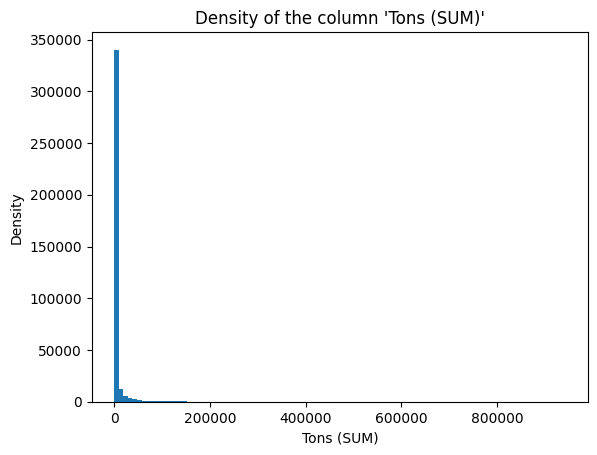

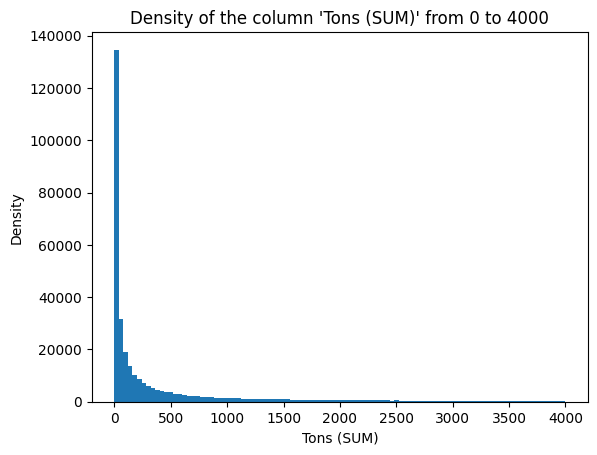

The skewness of the column 'Tons (SUM)' is 11.477663278571034
The skewness of the column 'Tons (SUM)' after box-cox transformation is -0.01802198786143868


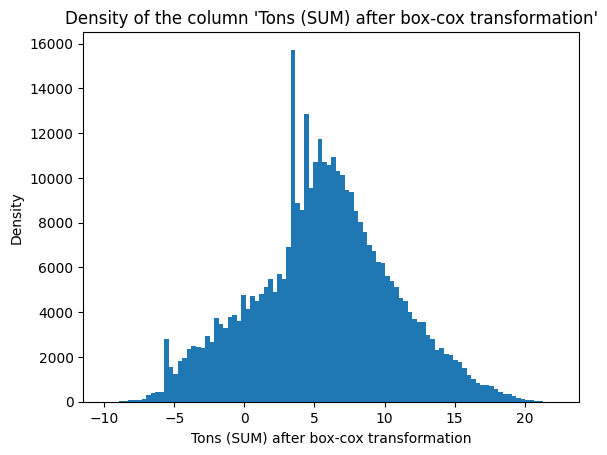

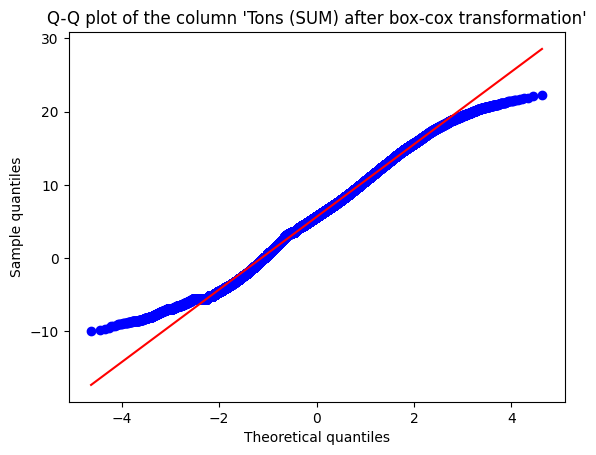

The K-S statistic of the column 'Tons (SUM) after box-cox transformation' is 0.038604893945677954
The p-value of the K-S test of the column 'Tons (SUM) after box-cox transformation' is 0.0


In [5]:
# load the data from the csv file
df_outlier_removed.to_csv("reportData/withBoxCoxValueOutlierRemoved.csv", index=False)
# plot the density of the column "Tons (SUM)" in histogram
df["Tons (SUM)"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Tons (SUM)'")
plt.xlabel("Tons (SUM)")
plt.ylabel("Density")
plt.show()

# plot the density of the column "Tons (SUM)" in histogram from 0 to 4000
df["Tons (SUM)"].plot(kind='hist', bins=100, range=(0, 4000))
plt.title("Density of the column 'Tons (SUM)' from 0 to 4000")
plt.xlabel("Tons (SUM)")
plt.ylabel("Density")
plt.show()

# do box-cox transformation on the column "Tons (SUM)" in the new column "Tons (SUM) after box-cox transformation"
df["Tons (SUM) after box-cox transformation"], lambdaForTons = stats.boxcox(df["Tons (SUM)"])
print("The skewness of the column 'Tons (SUM)' is", df["Tons (SUM)"].skew())
print("The skewness of the column 'Tons (SUM)' after box-cox transformation is", df["Tons (SUM) after box-cox transformation"].skew())

# plot the density of the column "Tons (SUM) after box-cox transformation" in histogram
df["Tons (SUM) after box-cox transformation"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Tons (SUM) after box-cox transformation'")
plt.xlabel("Tons (SUM) after box-cox transformation")
plt.ylabel("Density")
plt.show()

# plot the Q-Q plot of the column "Tons (SUM) after box-cox transformation"
stats.probplot(df["Tons (SUM) after box-cox transformation"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'Tons (SUM) after box-cox transformation'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# do the K-S test on the column "Tons (SUM) after box-cox transformation"
loc, scale = stats.norm.fit(df["Tons (SUM) after box-cox transformation"])
ksStat, ksPValue = stats.kstest(df["Tons (SUM) after box-cox transformation"], 'norm', args=(loc, scale))
print("The K-S statistic of the column 'Tons (SUM) after box-cox transformation' is", ksStat)
print("The p-value of the K-S test of the column 'Tons (SUM) after box-cox transformation' is", ksPValue)

# save the data to a new csv file
df.to_csv("reportData/withBoxCoxTons.csv", index=False)

In [6]:
# load the data from the csv file
df = pd.read_csv("reportData/withBoxCoxTons.csv")

# calculate the z-score of the column "Tons (SUM) after box-cox transformation"
z = stats.zscore(df["Tons (SUM) after box-cox transformation"])
# print the rows with z-score < -2
print(df[z<= -2].shape)
print(df[z<= -2].head())
# remove the rows with z-score < -2
df_outlier_removed = df[z > -2]

# save the data to a new csv file
df_outlier_removed.to_csv("reportData/withBoxcoxValueAndTonsOutlierRemoved.csv", index=False)

(10104, 9)
       Export_country Import_country  Month  Year  Nominal Value (SUM)  \
4               Italy      Sri Lanka      1  2013          1400.911255   
126       Netherlands  Côte d'Ivoire      1  2013          2529.090332   
216        Bangladesh        Denmark      1  2013           170.291199   
221    Czech Republic       Thailand      1  2013           738.371979   
248  China (mainland)        Iceland      1  2013            18.988224   

     Tons (SUM)          Price  \
4      0.004000  350227.813721   
126    0.004000  632272.552976   
216    0.003000   56763.732417   
221    0.005000  147674.388738   
248    0.000855   22204.778353   

     Nominal Value (SUM) after box-cox transformation  \
4                                            8.881615   
126                                          9.772241   
216                                          5.927933   
221                                          7.947885   
248                                          3.192845 

### on the Price

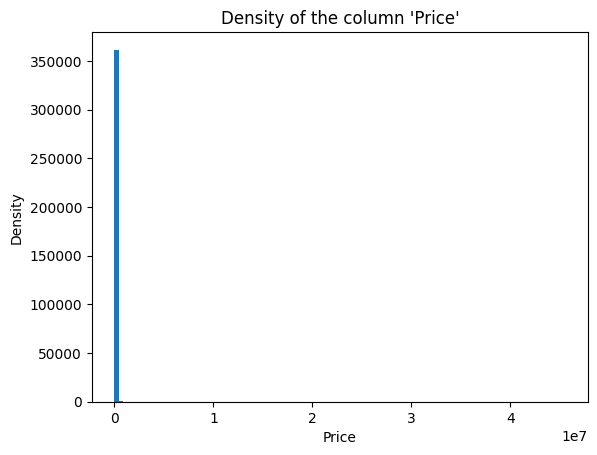

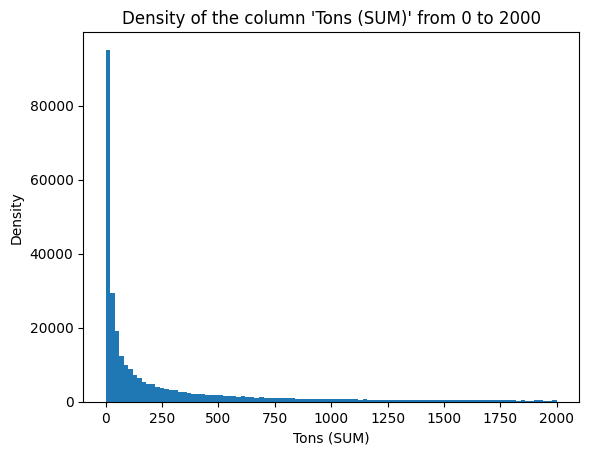

The skewness of the column 'Price' is 237.8567900919991
The skewness of the column 'Price' after box-cox transformation is -0.7162694526469753
count    362415.000000
mean          3.350762
std           0.155658
min          -3.982898
25%           3.254673
50%           3.329957
75%           3.433230
max           3.939961
Name: Price after box-cox transformation, dtype: float64


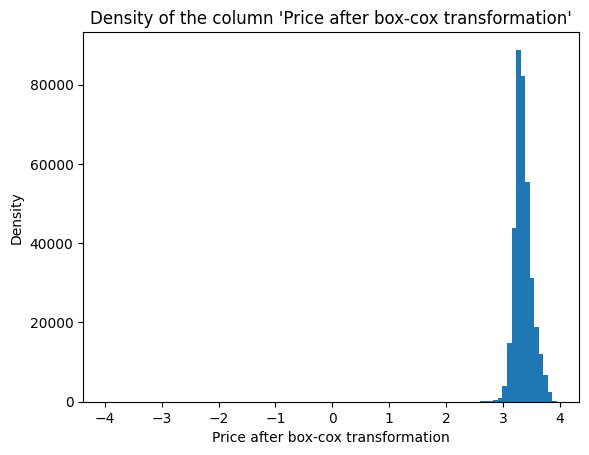

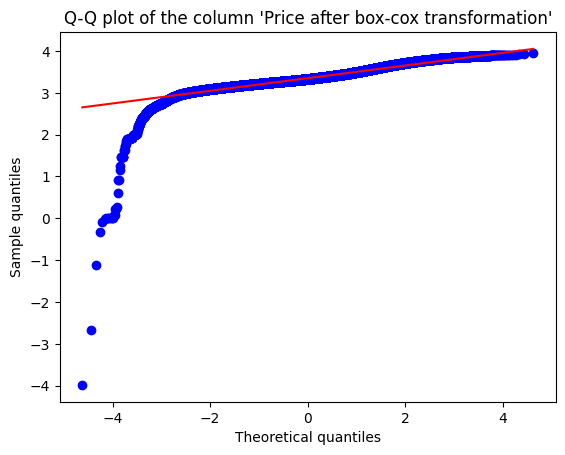

The K-S statistic of the column 'Price after box-cox transformation' is 0.06233781922804549
The p-value of the K-S test of the column 'Price after box-cox transformation' is 0.0


In [7]:
# load the data from the csv file
df = pd.read_csv("reportData/withBoxcoxValueAndTonsOutlierRemoved.csv")

# plot the density of the column "Price" in histogram
df["Price"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Price'")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# plot the density of the column "Tons (SUM)" in histogram from 0 to 2000
df["Tons (SUM)"].plot(kind='hist', bins=100, range=(0, 2000))
plt.title("Density of the column 'Tons (SUM)' from 0 to 2000")
plt.xlabel("Tons (SUM)")
plt.ylabel("Density")
plt.show()

# do box-cox transformation on the column "Price" in the new column "Price after box-cox transformation"
df["Price after box-cox transformation"], lambdaForPrice = stats.boxcox(df["Price"])
print("The skewness of the column 'Price' is", df["Price"].skew())
print("The skewness of the column 'Price' after box-cox transformation is", df["Price after box-cox transformation"].skew())
print(df["Price after box-cox transformation"].describe())

# plot the density of the column "Price after box-cox transformation" in histogram
df["Price after box-cox transformation"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Price after box-cox transformation'")
plt.xlabel("Price after box-cox transformation")
plt.ylabel("Density")
plt.show()

# plot the Q-Q plot of the column "Price after box-cox transformation"
stats.probplot(df["Price after box-cox transformation"], dist="norm", plot=plt)
plt.title("Q-Q plot of the column 'Price after box-cox transformation'")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.show()

# do the K-S test on the column "Price after box-cox transformation"
loc, scale = stats.norm.fit(df["Price after box-cox transformation"])
ksStat, ksPValue = stats.kstest(df["Price after box-cox transformation"], 'norm', args=(loc, scale))
print("The K-S statistic of the column 'Price after box-cox transformation' is", ksStat)
print("The p-value of the K-S test of the column 'Price after box-cox transformation' is", ksPValue)

# save the data to a new csv file
df.to_csv("reportData/withBoxCoxPrice.csv", index=False)


In [8]:
# load the data from the csv file
df = pd.read_csv("reportData/withBoxCoxPrice.csv")

# calculate the z-score of the column "Price after box-cox transformation"
z = stats.zscore(df["Price after box-cox transformation"])
# print the rows with the absolute z-score > 2
print(df[abs(z) > 2].shape)
print(df[abs(z) > 2].head())
# remove the rows with the absolute z-score > 2
df_outlier_removed = df[abs(z) <= 2]

# save the data to a new csv file
df_outlier_removed.to_csv("reportData/withBoxCoxValueAndTonsAndPriceOutlierRemoved.csv", index=False)


(19063, 10)
           Export_country    Import_country  Month  Year  Nominal Value (SUM)  \
33                Estonia  China (mainland)      1  2013          1796.040039   
83   United Arab Emirates        Kazakhstan      1  2013         11652.360352   
130               Austria             Sudan      1  2013          3259.479980   
138              Bulgaria              Peru      1  2013         20452.968750   
139               Austria              Peru      1  2013         44008.300781   

     Tons (SUM)         Price  \
33     0.050405  35631.899095   
83     0.329400  35374.499839   
130    0.100000  32594.799319   
138    0.572653  35716.163557   
139    2.000000  22004.150391   

     Nominal Value (SUM) after box-cox transformation  \
33                                           9.252721   
83                                          12.212718   
130                                         10.163624   
138                                         13.163911   
139              

### filtered data

In [9]:
# load the data from the csv file
df = pd.read_csv("reportData/withBoxCoxValueAndTonsAndPriceOutlierRemoved.csv")

# drop the box-cox transformed columns
df = df.drop(columns=["Nominal Value (SUM) after box-cox transformation", "Tons (SUM) after box-cox transformation", "Price after box-cox transformation"])

# save the data to a new csv file
df.to_csv("reportData/filtered.csv", index=False)

## filtered

### over Tons

In [10]:
# load the data from the csv file
df = pd.read_csv("reportData/filtered.csv")

# get the largest "Tons (SUM)"
largestTons = df["Tons (SUM)"].max()

# print the rows with the largest "Tons (SUM)"
print(df[df["Tons (SUM)"] == largestTons])

       Export_country Import_country  Month  Year  Nominal Value (SUM)  \
276890         Russia         Mexico      7  2021         6.351579e+08   

        Tons (SUM)       Price  
276890  943257.743  673.366193  


In [11]:
# load the data from the csv file# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# arrange the data in "Tons (SUM)" in ascending order
df = df.sort_values(by="Tons (SUM)")

# calculate the average price(sum of "Nominal Value (SUM)" divided by sum of "Tons (SUM)") for each range of "Tons (SUM)" (0-1000, 1000-2000, 2000-3000, ...)
averagePrice = []

# # generate a range of "Tons (SUM)" with 1000 bins using np.linspace
# rangeOfTons_Price = np.linspace(0, 100000, 1000)

# generate a range of "Tons (SUM)"
binSize = 100
rangeOfTons_Price = range(0, 60000, binSize)
    
for i in rangeOfTons_Price:
    averagePrice.append(df[(df["Tons (SUM)"] >= i) & (df["Tons (SUM)"] < i + binSize)]["Nominal Value (SUM)"].sum() / df[(df["Tons (SUM)"] >= i) & (df["Tons (SUM)"] < i + binSize)]["Tons (SUM)"].sum())
# plot the average price for each range of "Tons (SUM)"



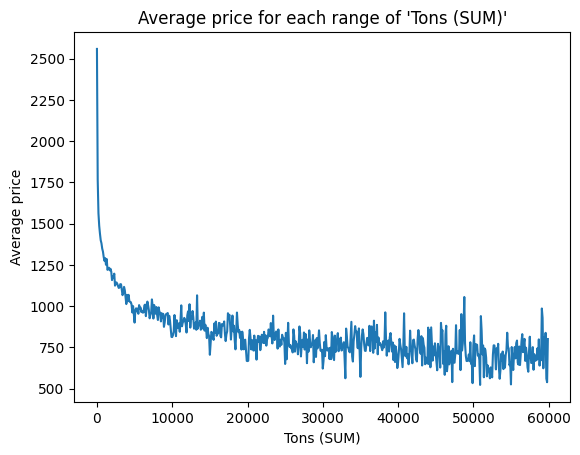

In [12]:
plt.plot(rangeOfTons_Price, averagePrice)
plt.title("Average price for each range of 'Tons (SUM)'")
plt.xlabel("Tons (SUM)")
plt.ylabel("Average price")
plt.show()

In [13]:
# load the data from the csv file# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# caculate the ratio of "Nominal Value (SUM)" to the total "Nominal Value (SUM)"
df["Ratio of Nominal Value (SUM)"] = df["Nominal Value (SUM)"] / df["Nominal Value (SUM)"].sum()

# caculate the ratio of "Tons (SUM)" to the total "Tons (SUM)"
df["Ratio of Tons (SUM)"] = df["Tons (SUM)"] / df["Tons (SUM)"].sum()

# generate a range of "Nominal Value (SUM)" with 100 bins using np.linspace
binSize = 0.1
rangeOfTons_Value = np.linspace(0, 100, int(100/binSize))

# # generate a range of "Nominal Value (SUM)"
# binSize = 1
# rangeOfTons_Value = range(0, 100, binSize)

# calculate the sum of "Nominal Value (SUM)" for each range of "Tons (SUM)" (0-1000, 1000-2000, 2000-3000, ...)
sumNominalValue = []
for i in rangeOfTons_Value:
    # sumNominalValue.append(df[(df["Tons (SUM)"] >= i) & (df["Tons (SUM)"] < i + binSize)]["Ratio of Tons (SUM)"].sum())
        sumNominalValue.append(df[(df["Tons (SUM)"] >= i) & (df["Tons (SUM)"] < i + binSize)]["Ratio of Nominal Value (SUM)"].sum())
# plot the sum of "Nominal Value (SUM)" for each range of "Tons (SUM)"

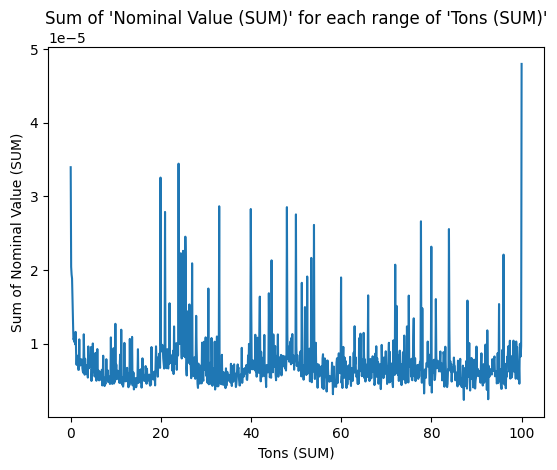

In [14]:
plt.plot(rangeOfTons_Value, sumNominalValue)
plt.title("Sum of 'Nominal Value (SUM)' for each range of 'Tons (SUM)'")
plt.xlabel("Tons (SUM)")
plt.ylabel("Sum of Nominal Value (SUM)")
plt.show()

### over Price

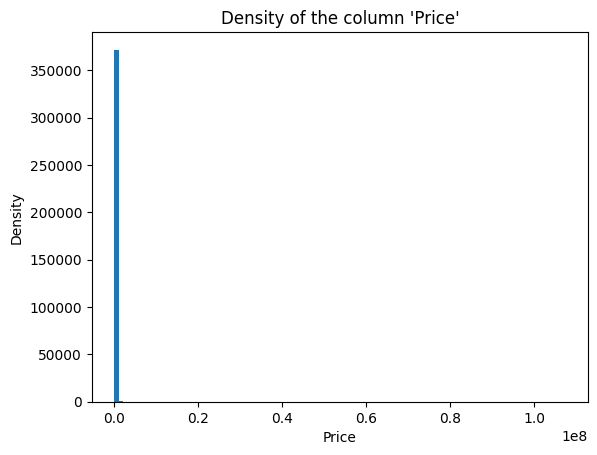

The skewness of the column 'Price' is 115.76684860817622
The skewness of the column 'Price' after log transformation is 1.9339894771808241
The skewness of the column 'Price after log transformation' is 1.9339894771808241
The skewness of the column 'Price after box-cox transformation(log)' is -0.4753034864405037


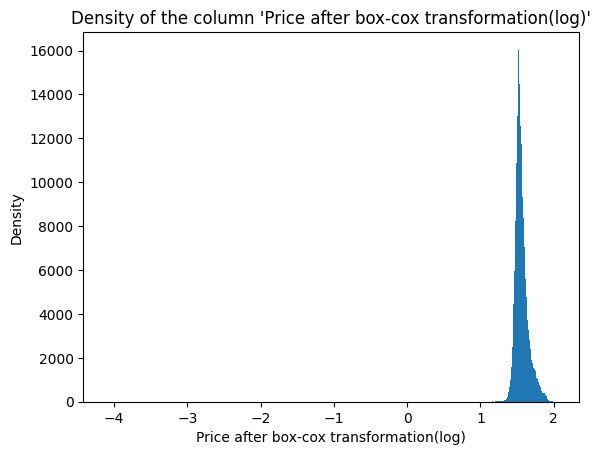

The skewness of the column 'Price' is 115.76684860817622
The skewness of the column 'Price' after box-cox transformation is -0.9138341717757332


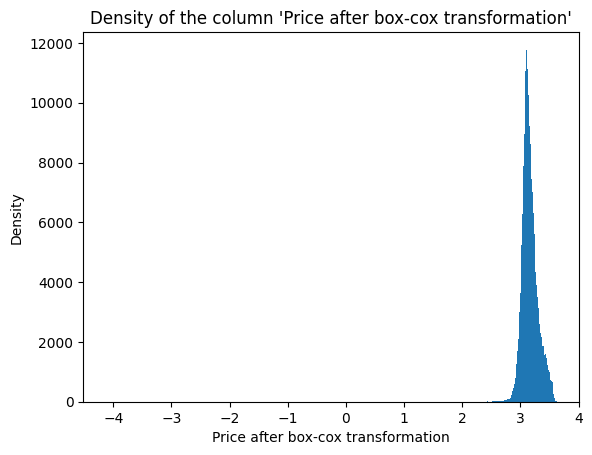

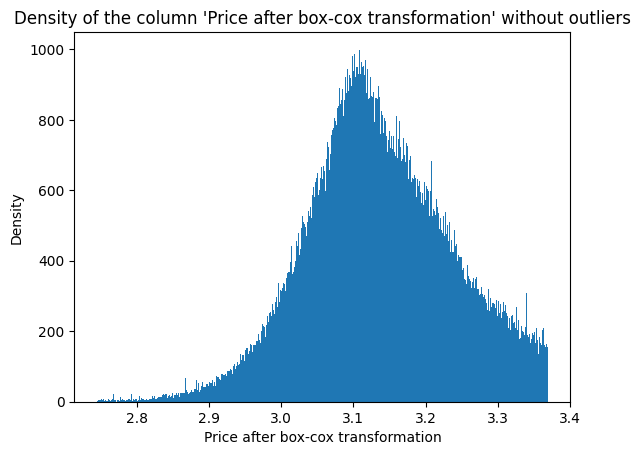

163.9053744504914
12254.992229515636


In [15]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# get the distribution of the original "Price" column
df["Price"].plot(kind='hist', bins=100)
plt.title("Density of the column 'Price'")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# take the log transformation on the column "Price" in the new column "Price after log transformation"
df["Price after log transformation"] = np.log(df["Price"]+1.0)
print("The skewness of the column 'Price' is", df["Price"].skew())
print("The skewness of the column 'Price' after log transformation is", df["Price after log transformation"].skew())

# do the box-cox transformation on the column "Price after log transformation" in the new column "Price after box-cox transformation(log)"
df["Price after box-cox transformation(log)"], lambdaForPrice = stats.boxcox(df["Price after log transformation"])
print("The skewness of the column 'Price after log transformation' is", df["Price after log transformation"].skew())
print("The skewness of the column 'Price after box-cox transformation(log)' is", df["Price after box-cox transformation(log)"].skew())

# plot the density of the column "Price after box-cox transformation(log)" in histogram
df["Price after box-cox transformation(log)"].plot(kind='hist', bins=1000)
plt.title("Density of the column 'Price after box-cox transformation(log)'")
plt.xlabel("Price after box-cox transformation(log)")
plt.ylabel("Density")
plt.show()

# do the box-cox transformation on the column "Price" in the new column "Price after box-cox transformation"
df["Price after box-cox transformation"], lambdaForPrice = stats.boxcox(df["Price"])
print("The skewness of the column 'Price' is", df["Price"].skew())
print("The skewness of the column 'Price' after box-cox transformation is", df["Price after box-cox transformation"].skew())

# get the distribution of the column "Price after box-cox transformation"
df["Price after box-cox transformation"].plot(kind='hist', bins=1000)
plt.title("Density of the column 'Price after box-cox transformation'")
plt.xlabel("Price after box-cox transformation")
plt.ylabel("Density")
plt.show()

# remove the outliers by z-score of the column "Price after box-cox transformation"
z = stats.zscore(df["Price after box-cox transformation"])
df_outlier_removed = df[(z <= 1.5) & (z >= -3)]

# plot the density of the column "Price after box-cox transformation" in histogram
df_outlier_removed["Price after box-cox transformation"].plot(kind='hist', bins=1000)
plt.title("Density of the column 'Price after box-cox transformation' without outliers")
plt.xlabel("Price after box-cox transformation")
plt.ylabel("Density")
plt.show()

# show the smallest "Price" after removing the outliers
print(df_outlier_removed["Price"].min())
# show the largest "Price" after removing the outliers
print(df_outlier_removed["Price"].max())




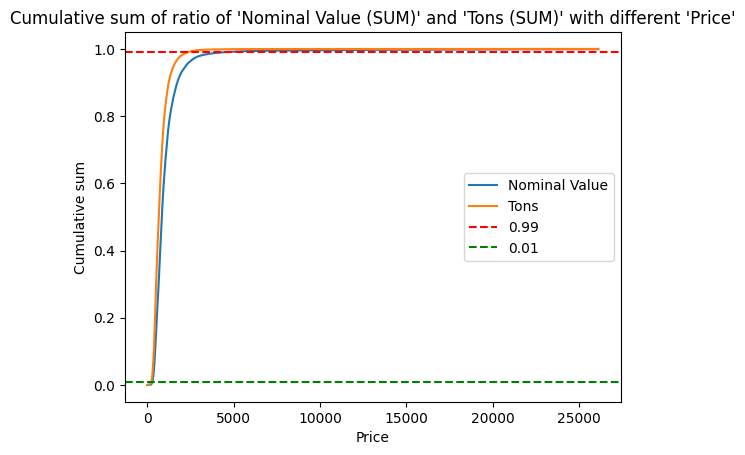

The price of the 99% of the 'Nominal Value (SUM)' is 4424.289681793392
The price of the 99% of the 'Tons (SUM)' is 2340.5674681369524
The price of the 1% of the 'Nominal Value (SUM)' is 290.9286232907862
The price of the 1% of the 'Tons (SUM)' is 233.9994470202901


In [16]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

df = df.sort_values(by="Price", ascending=True)

# get the ratio of "Nominal Value (SUM)" to the total "Nominal Value (SUM)"
df["Ratio of Nominal Value (SUM)"] = df["Nominal Value (SUM)"] / df["Nominal Value (SUM)"].sum()

# get the cumulative sum of the ratio of "Nominal Value (SUM)" with different "Price"
df["Cumulative sum of ratio of Nominal Value (SUM)"] = df["Ratio of Nominal Value (SUM)"].cumsum()

# get the ratio of "Tons (SUM)" to the total "Tons (SUM)"
df["Ratio of Tons (SUM)"] = df["Tons (SUM)"] / df["Tons (SUM)"].sum()

# get the cumulative sum of the ratio of "Tons (SUM)" with different "Price"
df["Cumulative sum of ratio of Tons (SUM)"] = df["Ratio of Tons (SUM)"].cumsum()

# plot the cumulative sum of ratio of "Nominal Value (SUM)" with different "Price" in the same figure without the last 5 rows
plt.figure()
plt.plot(df["Price"][:-20000], df["Cumulative sum of ratio of Nominal Value (SUM)"][:-20000],label = "Nominal Value")
plt.plot(df["Price"][:-20000], df["Cumulative sum of ratio of Tons (SUM)"][:-20000],label = "Tons")
# draw the line of 0.99 with label
plt.axhline(y=0.99, color='r', linestyle='--', label="0.99")
# draw the line of 0.01 with label
plt.axhline(y=0.01, color='g', linestyle='--', label="0.01")
plt.title("Cumulative sum of ratio of 'Nominal Value (SUM)' and 'Tons (SUM)' with different 'Price'")
plt.xlabel("Price")
plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

# calculate the price of the 99% of the "Nominal Value (SUM)"
price = df[df["Cumulative sum of ratio of Nominal Value (SUM)"] >= 0.99]["Price"].iloc[0]
print("The price of the 99% of the 'Nominal Value (SUM)' is", price)

# calculate the price of the 99% of the "Tons (SUM)"
price = df[df["Cumulative sum of ratio of Tons (SUM)"] >= 0.99]["Price"].iloc[0]
print("The price of the 99% of the 'Tons (SUM)' is", price)

# calculate the price of the 1% of the "Nominal Value (SUM)"
price = df[df["Cumulative sum of ratio of Nominal Value (SUM)"] >= 0.01]["Price"].iloc[0]
print("The price of the 1% of the 'Nominal Value (SUM)' is", price)

# calculate the price of the 1% of the "Tons (SUM)"
price = df[df["Cumulative sum of ratio of Tons (SUM)"] >= 0.01]["Price"].iloc[0]
print("The price of the 1% of the 'Tons (SUM)' is", price)



In [197]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")

# filter the data with "Price" between 233 and 4424
df = df[(df["Price"] >= 233) & (df["Price"] <= 1500)]

# save the data to a new csv file
df.to_csv("reportData/filtered.csv", index=False)

## choose countries

In [198]:
# load the data from the csv file
df = pd.read_csv('reportData/filtered.csv')

# drop the column "Price" and "Month"
df = df.drop(columns=["Price"])

# group the data by "Export_country", "Import_country", "Year" and calculate the total export value and the total export volume
df = df.groupby(["Export_country", "Import_country", "Year"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# calculate the average price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]

# save the data to a csv file
df.to_csv("reportData/filtered_anually.csv", index=False)

# load the data from the csv file
df = pd.read_csv('reportData/filtered_anually.csv')

# drop the column "Price" and "Year"
df = df.drop(columns=["Price", "Year"])

# group the data by "Export_country", "Import_country" and calculate the total export value and the total export volume
df = df.groupby(["Export_country", "Import_country"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# calculate the average price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]

# save the data to a csv file
df.to_csv("reportData/filtered_decadely.csv", index=False)

In [199]:
# load the data from the csv file
df = pd.read_csv('reportData/filtered_decadely.csv')
# group the data by "Export_country" and calculate the total export value and the total export volume
df = df.groupby(["Export_country"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()
# calculate the Price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]
# save the data to a csv file
df.to_csv("reportData/decadely_exporters_withPrice.csv", index=False)

# load the data from the csv file
df = pd.read_csv('reportData/filtered_decadely.csv')
# group the data by "Import_country" and calculate the total export value and the total export volume
df = df.groupby(["Import_country"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()
# calculate the Price
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]
# save the data to a csv file
df.to_csv("reportData/decadely_importers_withPrice.csv", index=False)

# load the data from the csv file
df_exporters = pd.read_csv('reportData/decadely_exporters_withPrice.csv')
df_importers = pd.read_csv('reportData/decadely_importers_withPrice.csv')
# merge the two dataframes
df = pd.merge(df_exporters, df_importers, left_on="Export_country", right_on="Import_country", suffixes=('_exporter', '_importer'))
# rename the column "Export_country" to "Country" and drop the column "Import_country"
df = df.rename(columns={"Export_country": "Country"}).drop(columns=["Import_country"])
# save the data to a csv file
df.to_csv("reportData/decadely_trader.csv", index=False)
print(df.head())

# calculate the throughput of each country
df["Throughput"] = df["Nominal Value (SUM)_exporter"] + df["Nominal Value (SUM)_importer"]
# save the data to a csv file
df.to_csv("reportData/decadely_trader_withThroughput.csv", index=False)
print(df.head())

       Country  Nominal Value (SUM)_exporter  Tons (SUM)_exporter  \
0  Afghanistan                  7.333517e+04         8.789100e+01   
1      Albania                  1.197904e+08         2.381717e+05   
2      Algeria                  1.045511e+09         1.744895e+06   
3      Andorra                  2.217060e+05         2.769250e+02   
4       Angola                  2.094074e+07         5.127415e+04   

   Price_exporter  Nominal Value (SUM)_importer  Tons (SUM)_importer  \
0      834.387728                  2.532524e+08         4.698072e+05   
1      502.958154                  1.963268e+08         2.989780e+05   
2      599.182732                  5.220646e+09         1.017155e+07   
3      800.599477                  6.577580e+05         6.350151e+02   
4      408.407335                  5.118063e+08         7.138876e+05   

   Price_importer  
0      539.056128  
1      656.659628  
2      513.259489  
3     1035.814685  
4      716.928401  
       Country  Nominal Value (S

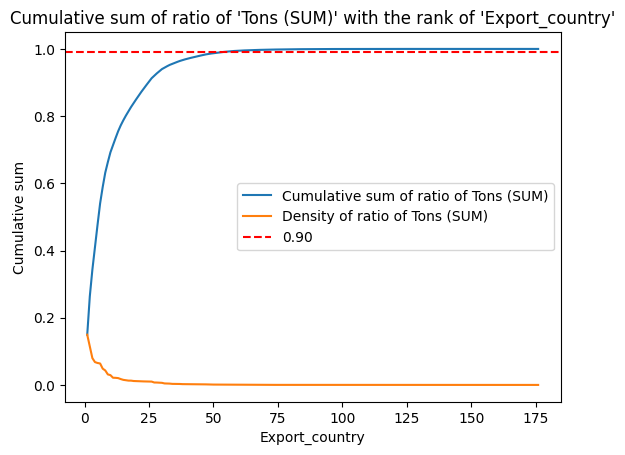

['Russia', 'China (mainland)', 'Japan', 'Ukraine', 'Brazil', 'South Korea', 'Germany', 'India', 'Belgium', 'France', 'Taiwan', 'United States', 'Netherlands', 'Iran', 'Canada', 'Italy', 'Malaysia', 'Vietnam', 'Slovakia', 'Mexico', 'Oman', 'Austria', 'Turkey', 'United Kingdom', 'Indonesia']


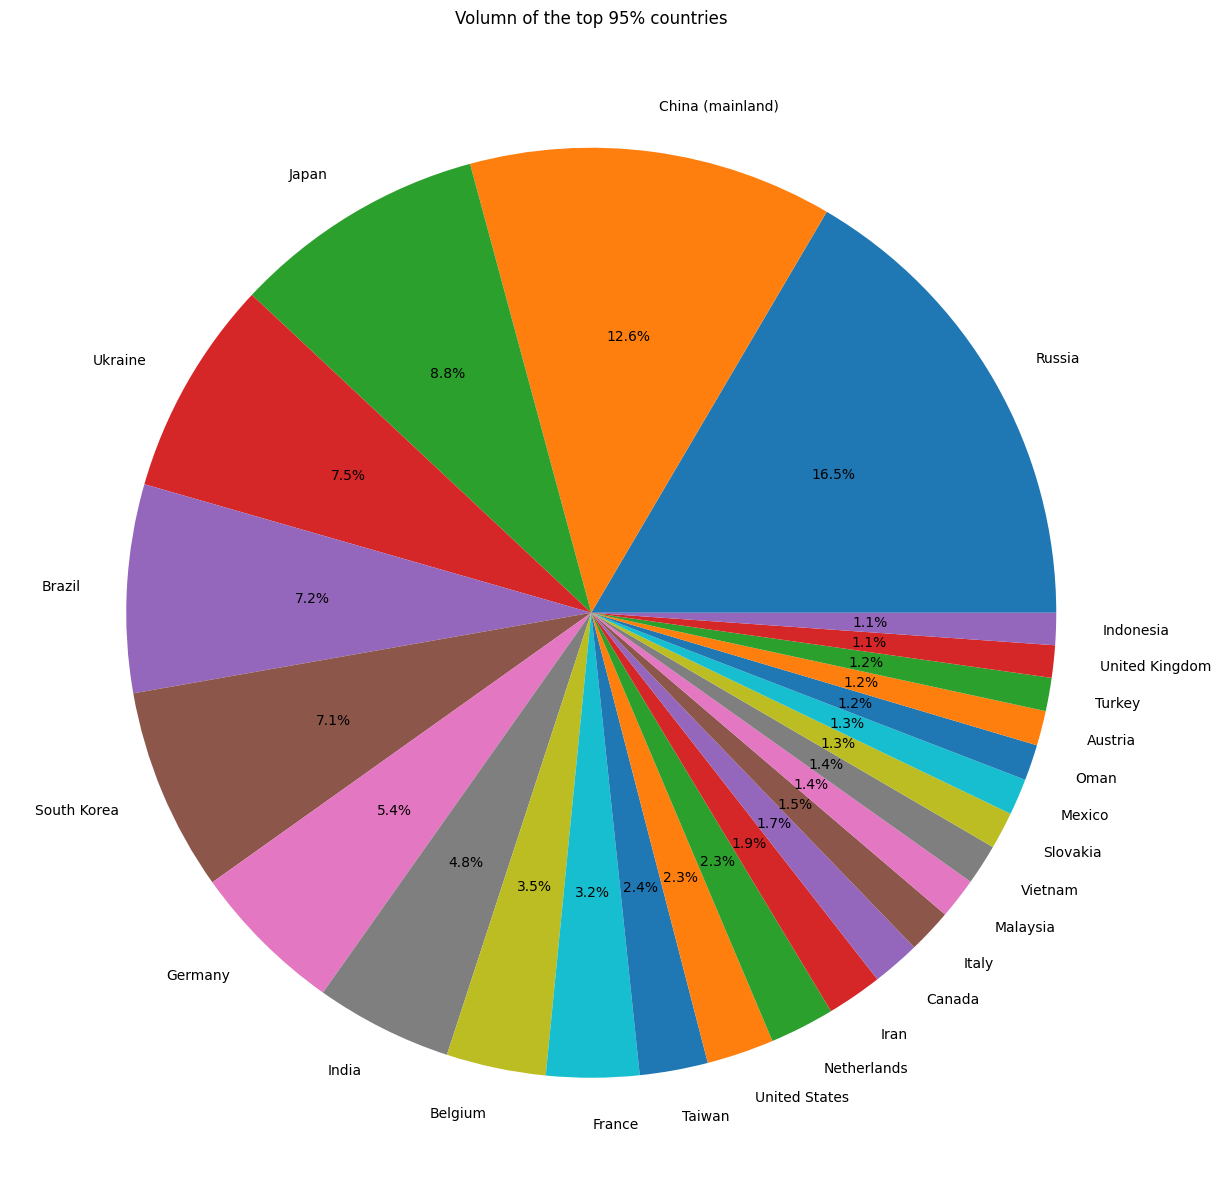

In [200]:
# load the data from the csv file
df = pd.read_csv('reportData/decadely_exporters_withPrice.csv')

# plot the cumulative sum of ratio of "Tons (SUM)" with the rank of "Export_country" in "Tons (SUM)" in the same figure
df.sort_values(by="Tons (SUM)", ascending=False, inplace=True)
df["Cumulative sum of ratio of Tons (SUM)"] = df["Tons (SUM)"].cumsum()/df["Tons (SUM)"].sum()
df["Density of ratio of Tons (SUM)"] = df["Tons (SUM)"]/df["Tons (SUM)"].sum()
plt.figure()
plt.plot(range(1, len(df)+1), df["Cumulative sum of ratio of Tons (SUM)"], label="Cumulative sum of ratio of Tons (SUM)")
# plot the density of the column "Cumulative sum of ratio of Tons (SUM)"
plt.plot(range(1, len(df)+1), df["Density of ratio of Tons (SUM)"], label="Density of ratio of Tons (SUM)")
# draw the line of 0.99 with label
plt.axhline(y=0.99, color='r', linestyle='--', label="0.90")
plt.title("Cumulative sum of ratio of 'Tons (SUM)' with the rank of 'Export_country'")
plt.xlabel("Export_country")
plt.ylabel("Cumulative sum")
plt.legend()
plt.show()

# store the countries that make up 90% of the total "Throughput" in the list "countries"
df.sort_values(by="Tons (SUM)", ascending=False, inplace=True)
countries = []
total = 0
for index, row in df.iterrows():
    total += row["Tons (SUM)"]
    countries.append(row["Export_country"])
    if total / df["Tons (SUM)"].sum() >= 0.9:
        break
print(countries)
# save the list "countries" to a csv file
pd.DataFrame(countries, columns=["Country"]).to_csv("reportData/top90Countries.csv", index=False)

# plot the pie chart of the "Tons (SUM)" of the top 90% countries
plt.figure(figsize=(15, 20))
plt.pie(df[df["Export_country"].isin(countries)]["Tons (SUM)"], labels=df[df["Export_country"].isin(countries)]["Export_country"], autopct='%1.1f%%')
plt.title("Volumn of the top 95% countries")
plt.show()


## analyse with the selected countries

In [201]:
# load the data from the csv file
df = pd.read_csv('reportData/filtered.csv')

# load the data from the csv file
df_countries = pd.read_csv('reportData/top90Countries.csv')

# filter the data with the "Export_country" in the list "countries"
df = df[df["Export_country"].isin(df_countries["Country"])]

# save the data to a csv file
df.to_csv("reportData/filtered_top90Countries.csv", index=False)

## dividing ...................

In [202]:
# load the data from the csv file
df = pd.read_csv('reportData/decadely_trader_withThroughput.csv')

# calculate the import and export difference in "Ton (SUM)" for each country
df["Ton (SUM)_difference"] = df["Tons (SUM)_exporter"] - df["Tons (SUM)_importer"]
# calculate the ratio of the import and export difference to import and export sum in "Ton (SUM)" for each country
df["Ton (SUM)_difference_ratio"] = df["Ton (SUM)_difference"] / (df["Tons (SUM)_exporter"] + df["Tons (SUM)_importer"])
# calculate the ratio of "Tons (SUM)_exporter" to "Tons (SUM)_importer"
df["Ton (SUM)_exporter_ratio"] = df["Tons (SUM)_exporter"] / df["Tons (SUM)_importer"]

# calculate the import and export difference in "Nominal Value (SUM)" for each country
df["Nominal Value (SUM)_difference"] = df["Nominal Value (SUM)_exporter"] - df["Nominal Value (SUM)_importer"]
# calculate the ratio of the import and export difference to import and export sum in "Nominal Value (SUM)" for each country
df["Nominal Value (SUM)_difference_ratio"] = df["Nominal Value (SUM)_difference"] / (df["Nominal Value (SUM)_exporter"] + df["Nominal Value (SUM)_importer"])
# calculate the ratio of "Nominal Value (SUM)_exporter" to "Nominal Value (SUM)_importer"
df["Nominal Value (SUM)_exporter_ratio"] = df["Nominal Value (SUM)_exporter"] / df["Nominal Value (SUM)_importer"]

# calculate the import and export difference in "Price" for each country
df["Price_difference"] = df["Price_exporter"] - df["Price_importer"]
# calculate the ratio of the import and export difference to import and export sum in "Price" for each country
df["Price_difference_ratio"] = df["Price_difference"] / (df["Price_exporter"] + df["Price_importer"])
# calculate the ratio of "Price_exporter" to "Price_importer"
df["Price_exporter_ratio"] = df["Price_exporter"] / df["Price_importer"]

# # calculate the ratio of "Nominal Value (SUM)_exporter" to the world total "Nominal Value (SUM)_exporter"
# df["Nominal Value (SUM)_exporter_ratio"] = df["Nominal Value (SUM)_exporter"] / df["Nominal Value (SUM)_exporter"].sum()
# # calculate the ratio of "Nominal Value (SUM)_importer" to the world total "Nominal Value (SUM)_importer"
# df["Nominal Value (SUM)_importer_ratio"] = df["Nominal Value (SUM)_importer"] / df["Nominal Value (SUM)_importer"].sum()
# # calculate the ratio of "Ton (SUM)_exporter" to the world total "Ton (SUM)_exporter"
# df["Ton (SUM)_exporter_ratio"] = df["Tons (SUM)_exporter"] / df["Tons (SUM)_exporter"].sum()
# # calculate the ratio of "Ton (SUM)_importer" to the world total "Ton (SUM)_importer"
# df["Ton (SUM)_importer_ratio"] = df["Tons (SUM)_importer"] / df["Tons (SUM)_importer"].sum()
# # calculate the ratio of "Throughput" to the world total "Throughput"
# df["Throughput_ratio"] = df["Throughput"] / df["Throughput"].sum()

# load the countries that make up 95% of the total "Throughput"
df_top50 = pd.read_csv('reportData/top95Countries.csv')

# # filter the data with the countries that make up 95% of the total "Throughput"
# df = df[df["Country"].isin(df_top50["Country"])]

# save the data to a csv file
df.to_csv("reportData/decadely_trader_withDifference.csv", index=False)

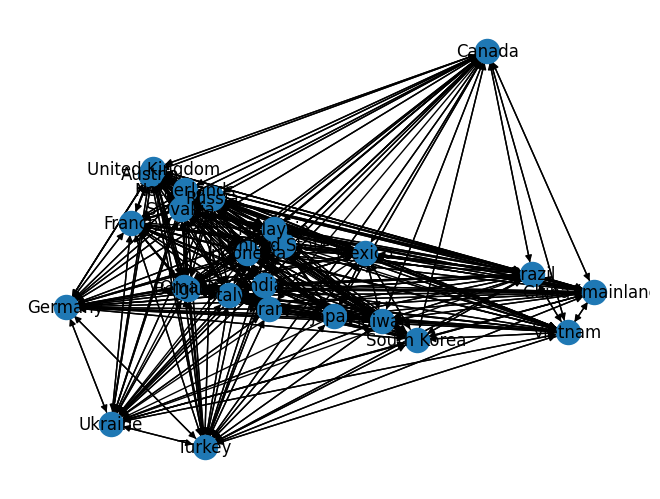

In [203]:
# load the data from the csv file
df = pd.read_csv('reportData/filtered_decadely.csv')

# load the data from the csv file
df_top95 = pd.read_csv('reportData/top90Countries.csv')

# filter the data with the countries that make up 95% of the total "Throughput"
df = df[df["Export_country"].isin(df_top95["Country"]) & df["Import_country"].isin(df_top95["Country"])]

# create the adjacency matrix whose weights are the "Nominal Value (SUM)" from the csv file with direction
adjacencyMatrix = pd.DataFrame(columns=df["Export_country"].unique(), index=df["Import_country"].unique())
adjacencyMatrix = adjacencyMatrix.fillna(0.0)

for index, row in df.iterrows():
    adjacencyMatrix.at[row["Import_country"], row["Export_country"]] = row["Nominal Value (SUM)"]

# save the adjacency matrix to a csv file
adjacencyMatrix.to_csv("reportData/adjacencyMatrix.csv")

# plot the network graph of the adjacency matrix
G = nx.from_pandas_adjacency(adjacencyMatrix, create_using=nx.DiGraph)
nx.circular_layout(G)
nx.draw(G, with_labels=True)
plt.show()



  Export_country    Import_country  Year  Nominal Value (SUM)  Tons (SUM)  \
0    Afghanistan           Austria  2019         20804.244141      21.400   
1    Afghanistan            Canada  2015           710.679321       0.993   
2    Afghanistan  China (mainland)  2013          2236.000000       2.758   
3    Afghanistan         Guatemala  2020          1744.000000       1.347   
4    Afghanistan           Senegal  2013         30812.240234      44.113   

         Price  
0   972.160958  
1   715.689145  
2   810.732415  
3  1294.729027  
4   698.484352  


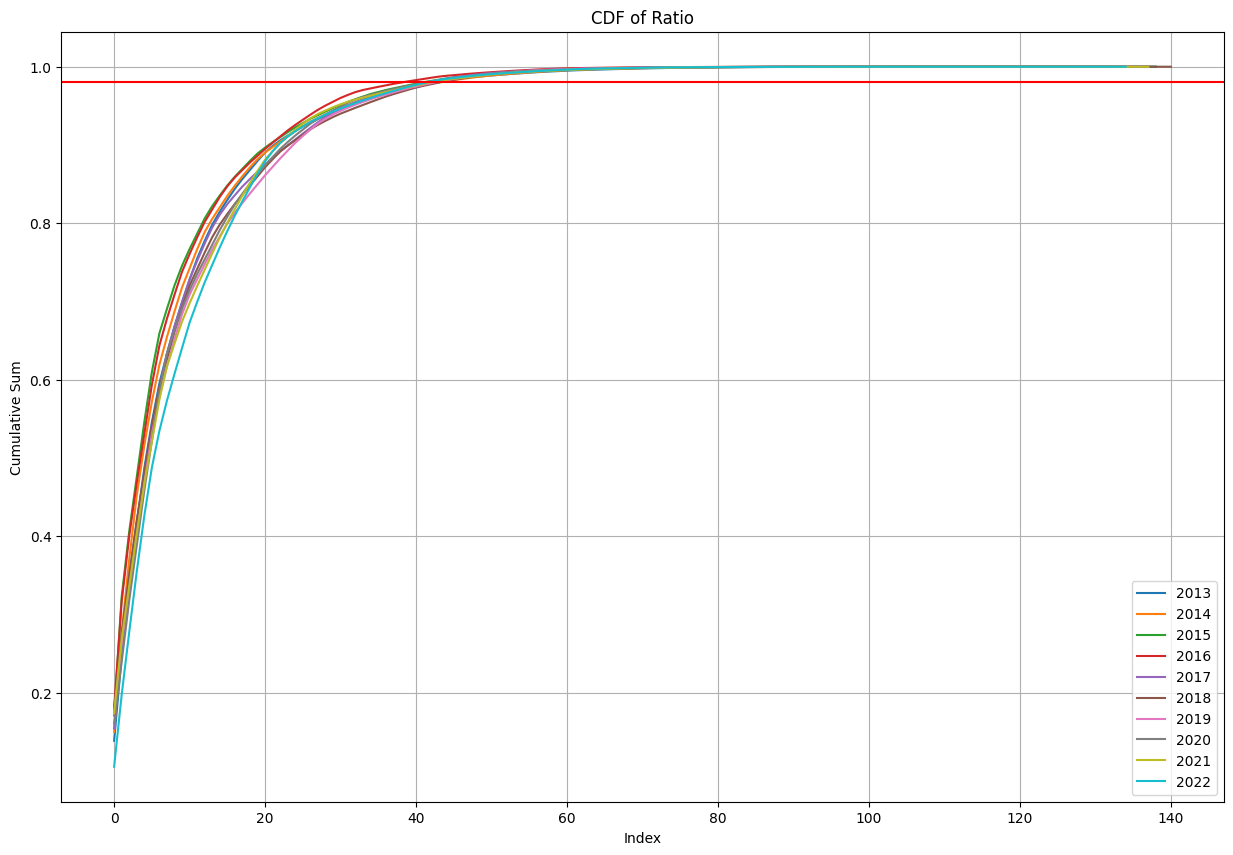

In [204]:
# load the data from the csv file
df = pd.read_csv("reportData/filtered_anually.csv")

# group the data by "Export_country", and "Year" and calculate the total export value and the total export volume
df_years = df.groupby(["Export_country", "Year"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()
print(df.head())

# # plot the bar chart with 11 bars from 2013 to 2023, and in each bar the contribution heaped by each country
# df = df.pivot(index="Year", columns="Export_country", values="Nominal Value (SUM)")
# df.plot(kind='bar', stacked=True)
# plt.title("Contribution of each country in each year")
# plt.xlabel("Year")
# plt.ylabel("Nominal Value (SUM)")
# plt.show()


# store the countries that make up 98% of the total "Nominal Value (SUM)" column in each year
df_98 = pd.DataFrame(columns=["Year", "Countries","Rank"])

# plot the cdf of the "Nominal Value (SUM)" column in the same plot for all the years
plt.figure(figsize=(15, 10))
for year in range(2013, 2023):
    # take the data in year
    df = df_years[df_years["Year"] == year].copy()
    # calculate the ratio of the "Nominal Value (SUM)" column to the sum of the "Nominal Value (SUM)" column of all the countries
    df["Ratio"] = df["Tons (SUM)"] / df["Tons (SUM)"].sum()
    # print(df.head())

    # arrange the data in descending order of the "Ratio" column
    df = df.sort_values("Ratio", ascending=False)
    # print(df.head())

    # record the first x countries that make up 98% of the total "Nominal Value (SUM)" column
    x = 0
    total = 0
    for index, row in df.iterrows():
        total += row["Ratio"]
        x += 1
        if total >= 0.99:
            break

    # store the countries that make up 98% of the total "Nominal Value (SUM)" column in each year
    countries = df["Export_country"].values[:x].tolist()
    df_98 = pd.concat([df_98, pd.DataFrame({"Year": year, "Countries": countries, "Rank": np.arange(1, x+1)})])

    # plot the cdf of the "Ratio" column
    plt.plot(np.arange(len(df)), np.cumsum(df["Ratio"]), label=str(year))
plt.xlabel("Index")
plt.ylabel("Cumulative Sum")
plt.title("CDF of Ratio")
# add the grid to the plot
plt.grid()
# add the y=0.98 line to the plot
plt.axhline(y=0.98, color="r", linestyle="-")
plt.legend()
plt.show()

# save the data to a csv file
df_98.to_csv("reportData\Iron_and_steel_98.csv", index=False)



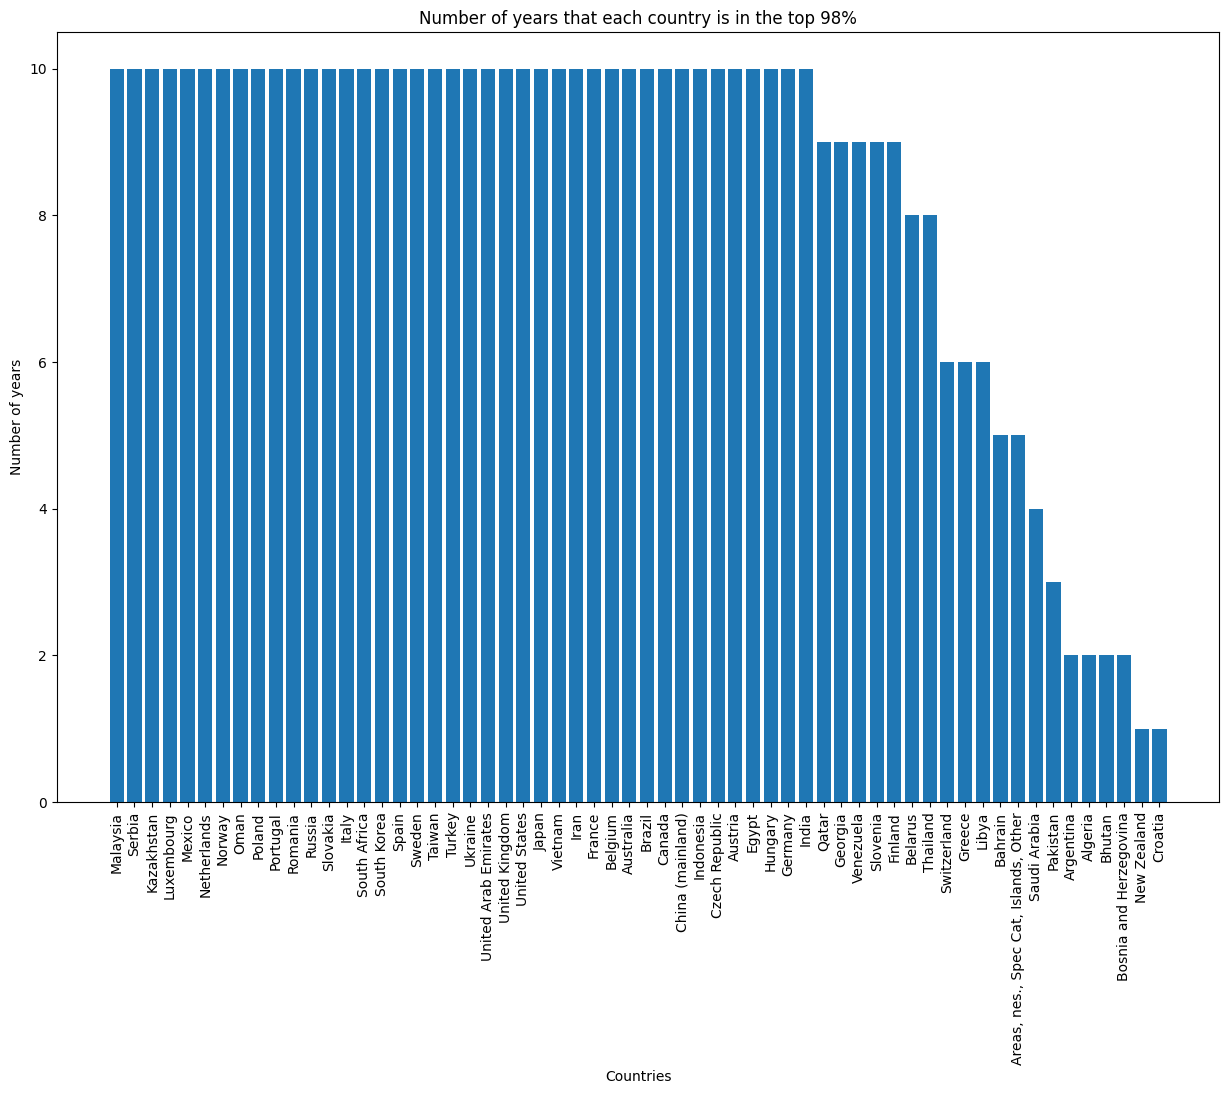

In [205]:
# load the data from the csv file
df = pd.read_csv("reportData\Iron_and_steel_98.csv")

# group the data by "Countries" and calculate the total number of years that each country is in the top 98%
df = df.groupby("Countries").agg({"Year": "count"}).reset_index()
df = df.rename(columns={"Year": "Number of years"})
df = df.sort_values("Number of years", ascending=False)

# plot the bar chart of the number of years that each country is in the top 98%
plt.figure(figsize=(15, 10))
# with the x-axis as the years and the y-axis as the countries
plt.bar(df["Countries"], df["Number of years"])
plt.title("Number of years that each country is in the top 98%")
plt.xlabel("Countries")
plt.ylabel("Number of years")
plt.xticks(rotation=90)
plt.show()


In [206]:
# choose countries with number of years >= 5
df = df[df["Number of years"] >= 8].reset_index(drop=True)
print(df)

# save the data to a csv file
df.to_csv("reportData\Iron_and_steel_98_top.csv", index=False)

               Countries  Number of years
0               Malaysia               10
1                 Serbia               10
2             Kazakhstan               10
3             Luxembourg               10
4                 Mexico               10
5            Netherlands               10
6                 Norway               10
7                   Oman               10
8                 Poland               10
9               Portugal               10
10               Romania               10
11                Russia               10
12              Slovakia               10
13                 Italy               10
14          South Africa               10
15           South Korea               10
16                 Spain               10
17                Sweden               10
18                Taiwan               10
19                Turkey               10
20               Ukraine               10
21  United Arab Emirates               10
22        United Kingdom          

## quarterly

In [207]:
# load the data from the csv file
df = pd.read_csv('reportData/filtered.csv')

# load the data from the csv file
df_top = pd.read_csv('reportData/top90Countries.csv')

# filter the data "Export_country" in the list "countries"
df = df[df["Export_country"].isin(df_top["Country"])]

# drop the column "Price"
df = df.drop(columns=["Price"])

# group the data by quarter
df["Month"] = df["Month"].apply(lambda x: int(x))
df["Quarter"] = df["Month"].apply(lambda x: (x-1)//3+1)
df = df.drop(columns=["Month"])
df = df.groupby(["Export_country", "Import_country", "Year", "Quarter"]).sum().reset_index()

# calculate the "Price" column
df["Price"] = df["Nominal Value (SUM)"] / df["Tons (SUM)"]

# save the data to a new csv file
df.to_csv("reportData/filtered_quarterly.csv", index=False)

In [350]:
# load the data from the csv file
df = pd.read_csv("reportData/filtered_quarterly.csv")

# depending on the "Year" and "Quarter" add a new column "Period" with the format  1 - 40
df["Period"] = (df["Year"]-2013)*4 + df["Quarter"]

# drop the column "Year" and "Quarter"
df = df.drop(columns=["Year", "Quarter"])
print(df.head())

# group the data by "Export_country" and "Period" and calculate the total export value and the total export volume
df = df.groupby(["Export_country", "Period"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# calculate the market share of each country in each period
for period in df["Period"].unique():
    # total = df[df["Period"] == period]["Nominal Value (SUM)"].sum()
    # df.loc[df["Period"] == period, "Market share"] = df[df["Period"] == period]["Nominal Value (SUM)"] / total
    total = df[df["Period"] == period]["Tons (SUM)"].sum()
    df.loc[df["Period"] == period, "Market share"] = df[df["Period"] == period]["Tons (SUM)"] / total

# pivot the table with "Export_country" as index, "Period" as columns and "Nominal Value (SUM)" as values
df1 = df.pivot(index="Export_country", columns="Period", values="Nominal Value (SUM)")

# save the data to a new csv file
df1.to_csv("reportData/filtered_quarterly_pivot.csv")
print(df1.head())

# pivot the table with "Export_country" as index, "Period" as columns and "Market share" as values
df2 = df.pivot(index="Export_country", columns="Period", values="Market share")

# save the data to a new csv file
df2.to_csv("reportData/filtered_quarterly_pivot_market_share.csv")
print(df2.head())

  Export_country Import_country  Nominal Value (SUM)  Tons (SUM)       Price  \
0        Austria        Albania           149.798004    0.395574  378.684742   
1        Austria        Albania           954.465027    1.082109  882.041156   
2        Austria        Albania            51.774799    0.136723  378.684742   
3        Austria        Algeria             1.330400    0.001437  925.830901   
4        Austria        Algeria            46.012199    0.070244  655.032200   

   Period  
0       5  
1      11  
2      35  
3       1  
4       7  
Period                      1             2             3             4   \
Export_country                                                             
Austria           5.785072e+08  5.379741e+08  5.165497e+08  4.766577e+08   
Belgium           1.522673e+09  1.319908e+09  1.234616e+09  1.235686e+09   
Brazil            1.281322e+09  1.007197e+09  9.301979e+08  1.172005e+09   
Canada            3.808821e+08  3.665632e+08  3.509917e+08  3.59178

Export_country     Austria   Belgium    Brazil    Canada  China (mainland)  \
Export_country                                                               
Austria           1.000000  0.839688 -0.239317 -0.305294         -0.048015   
Belgium           0.839688  1.000000  0.036833 -0.240763          0.024770   
Brazil           -0.239317  0.036833  1.000000  0.754858          0.189314   
Canada           -0.305294 -0.240763  0.754858  1.000000          0.097401   
China (mainland) -0.048015  0.024770  0.189314  0.097401          1.000000   

Export_country      France   Germany     India  Indonesia      Iran  ...  \
Export_country                                                       ...   
Austria           0.640833  0.728323 -0.084823  -0.211469 -0.049469  ...   
Belgium           0.677208  0.815134 -0.031348  -0.107499  0.247893  ...   
Brazil            0.210597  0.187424  0.697517   0.374166  0.360635  ...   
Canada            0.081257  0.082558  0.712724   0.382141  0.353574  ... 

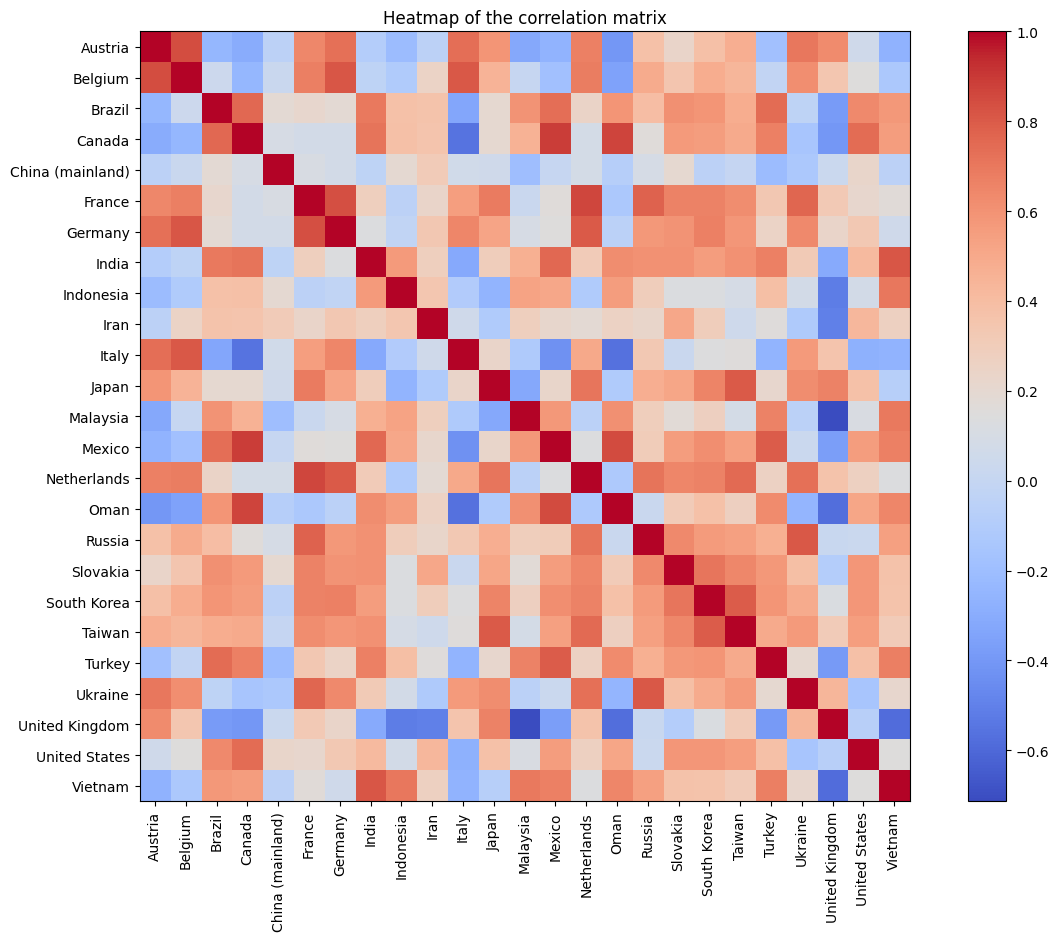

In [351]:
# load the data from the csv file
df = pd.read_csv("reportData/filtered_quarterly_pivot.csv")

# load the data from the csv file
df_top = pd.read_csv("reportData/filtered_top90Countries.csv")

# filter the data with the countries in the top 98%
df = df[df["Export_country"].isin(df_top["Export_country"])]
# print(df.head())
# count the missing values in the data
# print(df.isnull().sum().sum())

# drop the last column
df = df.drop(columns=["44"])
# print(df.head())
# count the missing values in the data
# print(df.isnull().sum().sum())

# transpose the table with "Export_country" as index
df = df.T
# set the first row as the column names
df.columns = df.iloc[0]
# drop the first row
df = df.drop(df.index[0])
# print(df.head())

# calculate the correlation matrix of the data
correlation_matrix = df.corr()
print(correlation_matrix.head())
#save the correlation matrix to a csv file
correlation_matrix.to_csv("reportData/correlation_matrix_1.csv")

# plot the heatmap of the correlation matrix(triangle matrix)
plt.figure(figsize=(15, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.columns)
plt.colorbar()
plt.title("Heatmap of the correlation matrix")
plt.show()



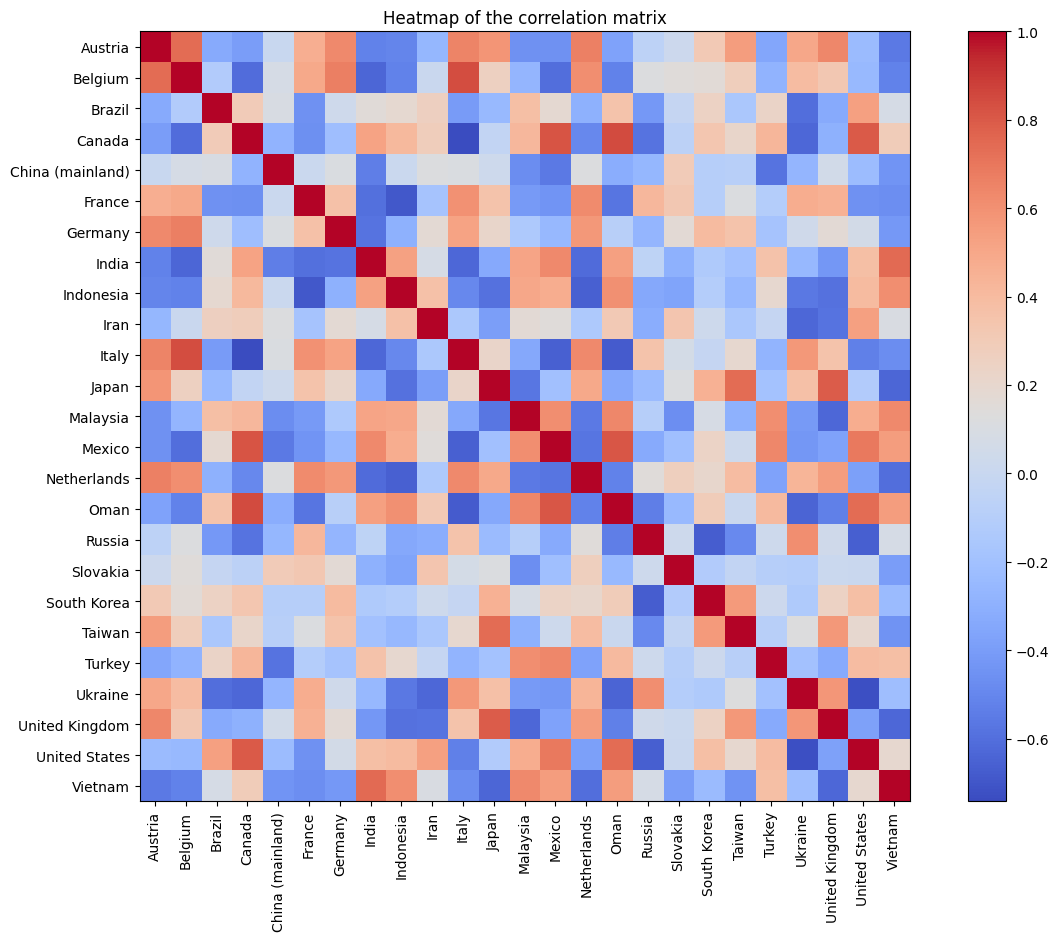

[('Belgium', 'Canada', -0.6068037298568955), ('Belgium', 'India', -0.6334328352443522), ('Belgium', 'Mexico', -0.6051571695467812), ('Brazil', 'Ukraine', -0.6041411875116245), ('Canada', 'Italy', -0.7418647515067062), ('Canada', 'Ukraine', -0.6285340419931834), ('France', 'Indonesia', -0.6909083510387773), ('India', 'Italy', -0.6308030877603569), ('India', 'Netherlands', -0.614327035609765), ('Indonesia', 'Netherlands', -0.6546091495874895), ('Iran', 'Ukraine', -0.6262590314792754), ('Italy', 'Mexico', -0.6560710208625338), ('Italy', 'Oman', -0.6783401494054064), ('Japan', 'Vietnam', -0.6372258406844438), ('Malaysia', 'United Kingdom', -0.6321656213683297), ('Netherlands', 'Vietnam', -0.6039683176426401), ('Oman', 'Ukraine', -0.644579428832795), ('Russia', 'South Korea', -0.6676834826948641), ('Russia', 'United States', -0.6657542973999186), ('Ukraine', 'United States', -0.7273777241858892), ('United Kingdom', 'Vietnam', -0.6323358055440301)]


In [352]:
# load the data from the csv file
df = pd.read_csv("reportData/filtered_quarterly_pivot_market_share.csv")

# filter the data with the countries in the top 98%
df = df[df["Export_country"].isin(df_top["Export_country"])]
# print(df.head())
# count the missing values in the data
# print(df.isnull().sum().sum())

# drop the last column
df = df.drop(columns=["44"])
# print(df.head())
# count the missing values in the data
# print(df.isnull().sum().sum())

# transpose the table with "Export_country" as index
df = df.T
# set the first row as the column names
df.columns = df.iloc[0]
# drop the first row
df = df.drop(df.index[0])
# print(df.head())

# calculate the correlation matrix of the data
correlation_matrix = df.corr()
# print(correlation_matrix)
# save the correlation matrix to a csv file
correlation_matrix.to_csv("reportData/correlation_matrix.csv")

# plot the heatmap of the correlation matrix(triangle matrix)
plt.figure(figsize=(15, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.columns)
plt.colorbar()
plt.title("Heatmap of the correlation matrix")
plt.show()

# # plot a network graph of the correlation matrix
# import networkx as nx
# G = nx.Graph()
# for i in range(len(correlation_matrix)):
#     for j in range(i+1, len(correlation_matrix)):
#         if (correlation_matrix.iloc[i, j]) < -0.7:
#             G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=correlation_matrix.iloc[i, j])
# pos = nx.spring_layout(G)
# plt.figure(figsize=(15, 10))
# nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, edge_color='gray', width=correlation_matrix.stack().abs()*10)
# plt.title("Network graph of the correlation matrix")
# plt.show()

# get the pairs whose correlation is less than -0.6
pairs = []
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if (correlation_matrix.iloc[i, j]) < -0.6:
            pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
print(pairs)

# save the pairs to a csv file
pd.DataFrame(pairs, columns=["Country1", "Country2", "Correlation"]).to_csv("reportData/pairs.csv", index=False)

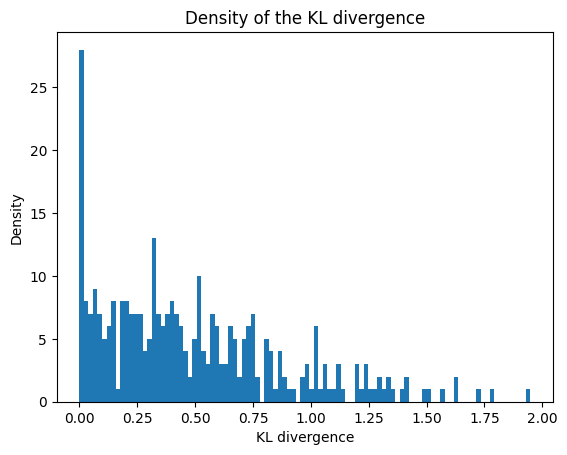

                   Austria   Belgium    Brazil    Canada  China (mainland)  \
Austria           0.000000  0.027928  1.094167  0.813923          0.876319   
Belgium           0.027928  0.000000  1.194224  0.443893          0.514616   
Brazil            1.094167  1.194224  0.000000  1.018835          0.449043   
Canada            0.813923  0.443893  1.018835  0.000000          0.591691   
China (mainland)  0.876319  0.514616  0.449043  0.591691          0.000000   

                    France   Germany     India  Indonesia      Iran  ...  \
Austria           0.321445  0.075071  0.580544   0.446287  1.948477  ...   
Belgium           0.336049  0.033627  0.730648   0.384967  1.391905  ...   
Brazil            0.622609  1.017613  0.248953   0.499018  0.072988  ...   
Canada            0.522760  0.743238  0.731211   0.732916  1.210161  ...   
China (mainland)  0.105633  0.480880  0.057095   0.155446  0.819036  ...   

                      Oman    Russia  Slovakia  South Korea    Taiwan  \
A

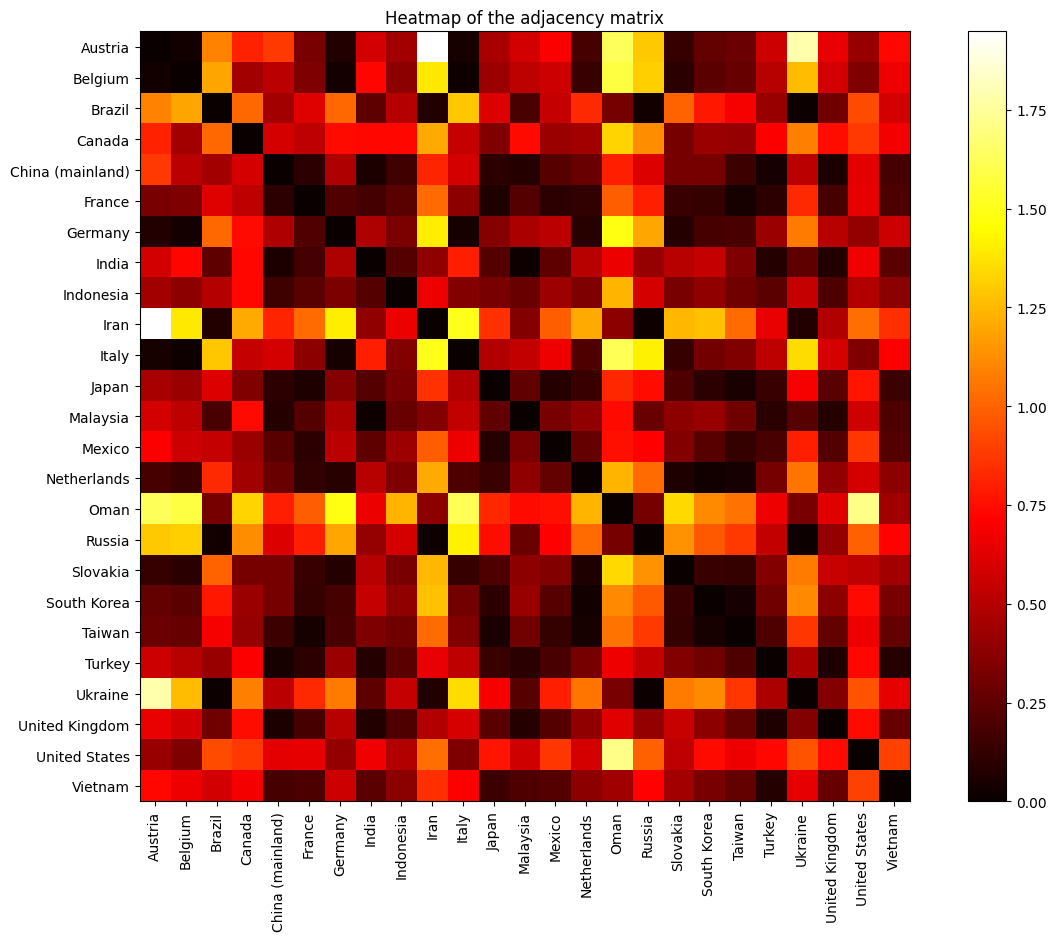

In [382]:
# load the data from the csv file
filtered_top90Countries = pd.read_csv("reportData/filtered_top90Countries.csv")

# divide 233 to 4425 into 10 bins
numOfBins = 10
bins = np.linspace(233, 1500, numOfBins)

# generate a dataframe to store the ratio of "Nominal Value (SUM)" to the total "Nominal Value (SUM)" for each bin for each "Export_country"
# with rows as "Export_country" and columns as bins
# save the data to a single csv file
df_store = pd.DataFrame(columns=["Export_country"] + [str(i) for i in range(numOfBins-1)])

for country in filtered_top90Countries["Export_country"].unique():
    # filter the data with the country
    df = filtered_top90Countries[filtered_top90Countries["Export_country"] == country].copy()
    # generate a dataframe to store the ratio of "Nominal Value (SUM)" to the total "Nominal Value (SUM)" for each bin
    df_ratio = pd.DataFrame(columns=[str(i) for i in range(numOfBins-1)])
    # calculate the total "Nominal Value (SUM)" for each bin
    for i in range(numOfBins-1):
        df_ratio.at[0, str(i)] = df[(df["Price"] >= bins[i]) & (df["Price"] < bins[i+1])]["Tons (SUM)"].sum()
    # calculate the ratio of "Nominal Value (SUM)" to the total "Nominal Value (SUM)" for each bin  
    df_ratio = df_ratio / df_ratio.sum(axis=1).values[0]
    # add the row to the dataframe
    df_store = pd.concat([df_store, pd.concat([pd.DataFrame({"Export_country": [country]}), df_ratio], axis=1)])

# print(df_store.head())
# save the data to a csv file
df_store.to_csv("reportData/filtered_top90Countries_ratio.csv", index=False)

# load the data from the csv file
df = pd.read_csv("reportData/filtered_top90Countries_ratio.csv")
# calculate the likelihood of the pairs of each row
pairs = []
for i in range(len(df)):
    for j in range(i, len(df)):
        # calculate the KL divergence of the two rows
        kl = stats.entropy(df.iloc[i, 1:].astype(float), df.iloc[j, 1:].astype(float))
        eulerDistance = np.linalg.norm(df.iloc[i, 1:].astype(float) - df.iloc[j, 1:].astype(float))
        
        # box-cox transformation on the KL divergence
        pairs.append((df.iloc[i, 0], df.iloc[j, 0], np.log(kl+1)))

# plot te distribution of the KL divergence
plt.figure()
plt.hist([pair[2] for pair in pairs], bins=100)
plt.title("Density of the KL divergence")
plt.xlabel("KL divergence")
plt.ylabel("Density")
plt.show()

# convert pairs into an adjacency matrix
adjacencyMatrix = pd.DataFrame(columns=df["Export_country"].sort_values().unique(), index=df["Export_country"].sort_values().unique())
adjacencyMatrix = adjacencyMatrix.fillna(0.0)
for pair in pairs:
    adjacencyMatrix.at[pair[0], pair[1]] = pair[2]
    adjacencyMatrix.at[pair[1], pair[0]] = pair[2]
print(adjacencyMatrix.head())

# save the adjacency matrix to a csv file
adjacencyMatrix.to_csv("reportData/adjacencyMatrix_KL.csv")

# plot the heatmap of the adjacency matrix
plt.figure(figsize=(15, 10))
plt.imshow(adjacencyMatrix, cmap='hot', interpolation='nearest')
plt.xticks(np.arange(len(adjacencyMatrix)), adjacencyMatrix.columns, rotation=90)
plt.yticks(np.arange(len(adjacencyMatrix)), adjacencyMatrix.columns)
plt.colorbar()
plt.title("Heatmap of the adjacency matrix")
plt.show()


                   Austria   Belgium    Brazil    Canada  China (mainland)  \
Export_country                                                               
Austria           0.000000  0.027928  1.094167  0.813923          0.876319   
Belgium           0.027928  0.000000  1.194224  0.443893          0.514616   
Brazil            1.094167  1.194224  0.000000  1.018835          0.449043   
Canada            0.813923  0.443893  1.018835  0.000000          0.591691   
China (mainland)  0.876319  0.514616  0.449043  0.591691          0.000000   

                    France   Germany     India  Indonesia      Iran  ...  \
Export_country                                                       ...   
Austria           0.321445  0.075071  0.580544   0.446287  1.948477  ...   
Belgium           0.336049  0.033627  0.730648   0.384967  1.391905  ...   
Brazil            0.622609  1.017613  0.248953   0.499018  0.072988  ...   
Canada            0.522760  0.743238  0.731211   0.732916  1.210161  ... 

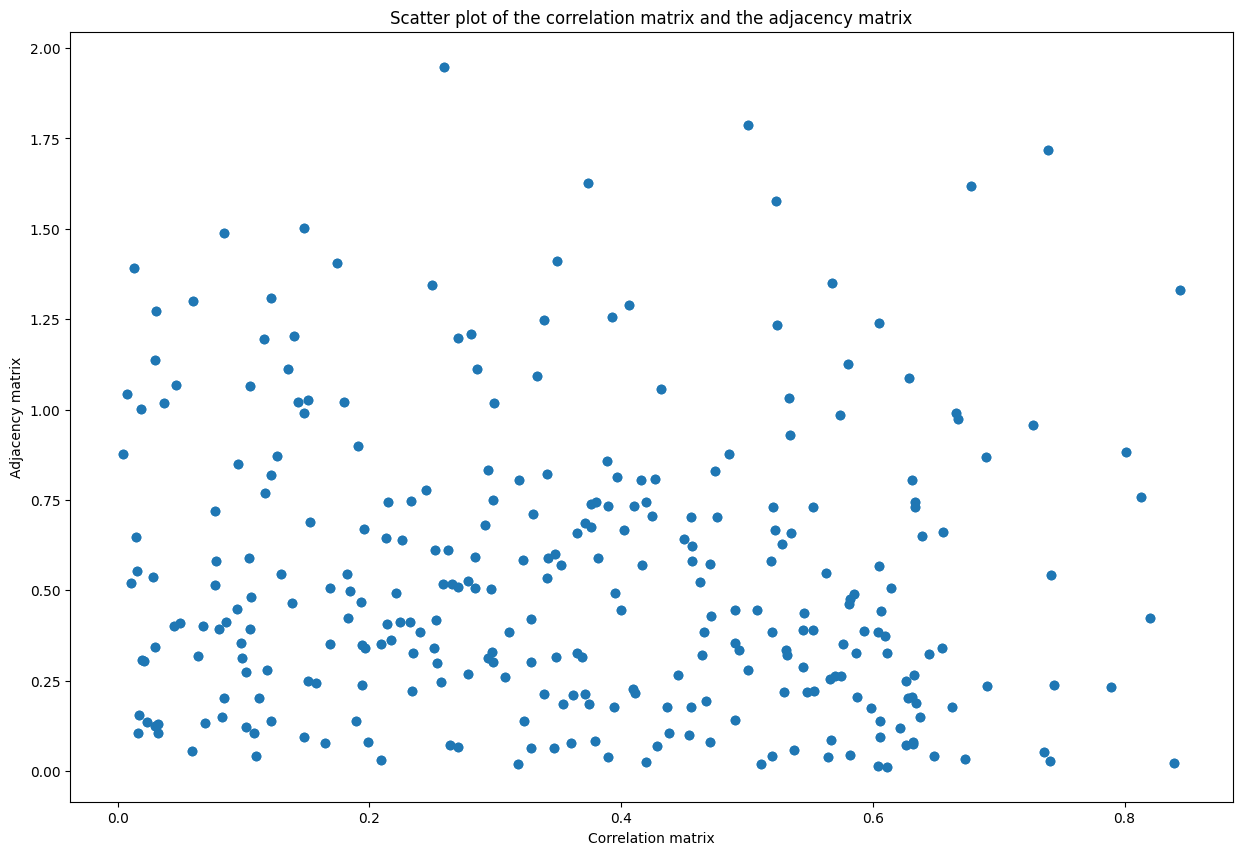

In [383]:
# load the data from the csv file
df = pd.read_csv("reportData/adjacencyMatrix_KL.csv")
# set the first column's name as "Export_country"
df = df.rename(columns={df.columns[0]: "Export_country"})
# set the first column as the index
df = df.set_index(df.columns[0])
print(df.head())

# load the correlation matrix from the csv file
correlation_matrix = pd.read_csv("reportData/correlation_matrix.csv", index_col=0)
# take half of the correlation matrix
print(correlation_matrix.head())

# flat all the values and do the correlation
correlation = correlation_matrix.values.flatten()
kl = df.values.flatten()

# calculate the correlation between the correlation matrix and the adjacency matrix
correlation = correlation[~np.isnan(correlation)]
# remove where the correlation matrix is 1
correlation = correlation[correlation != 1]
correlation = np.abs(correlation)

kl = kl[~np.isnan(kl)]
# remove where the adjacency matrix is 0
kl = kl[kl != 0]

print(correlation.shape)
print(kl.shape)
print(stats.pearsonr(correlation, kl))

# plot the scatter plot of the correlation matrix and the adjacency matrix
plt.figure(figsize=(15, 10))
plt.scatter(correlation, kl)
plt.xlabel("Correlation matrix")
plt.ylabel("Adjacency matrix")
plt.title("Scatter plot of the correlation matrix and the adjacency matrix")
plt.show()

In [384]:
# load the pairs
df_pairs = pd.read_csv("reportData/pairs.csv")

# load the data from the csv file
df = pd.read_csv("reportData/filtered.csv")

# filter the "Export_country" column with the countries in the pairs
df = df[df["Export_country"].isin(df_pairs["Country1"]) | df["Export_country"].isin(df_pairs["Country2"])]

# save the data to a new csv file
df.to_csv("reportData/filtered_pairs.csv", index=False)

# find the top 5 export destinations of each country by "Nominal Value (SUM)"
df = pd.read_csv("reportData/filtered_pairs.csv")
df = df.groupby(["Export_country", "Import_country"]).agg({"Nominal Value (SUM)": "sum"}).reset_index()
df = df.sort_values(["Export_country", "Nominal Value (SUM)"], ascending=[True, False])
df = df.groupby("Export_country").head(5)
print(df.head())

# save the data to a new csv file
df.to_csv("reportData/top5ExportDestinations.csv", index=False)

    Export_country  Import_country  Nominal Value (SUM)
47         Belgium          France         1.776400e+10
52         Belgium         Germany         1.335687e+10
99         Belgium     Netherlands         3.541152e+09
69         Belgium           Italy         2.692481e+09
147        Belgium  United Kingdom         1.421099e+09


<Figure size 1500x1000 with 0 Axes>

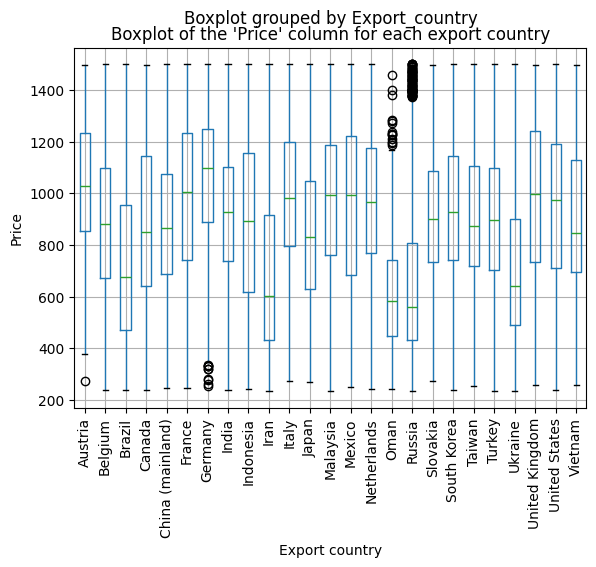

In [385]:
# load the data from the csv file
df = pd.read_csv("reportData/filtered_quarterly.csv")

# load the data from the csv file
df_top = pd.read_csv("reportData/Iron_and_steel_98_top.csv")

# filter the data with the countries in the top 98%
df = df[df["Export_country"].isin(df_top["Countries"])]

# plot the boxplot of the "Price" column for each export country
plt.figure(figsize=(15, 10))
df.boxplot(column="Price", by="Export_country", rot=90)
plt.title("Boxplot of the 'Price' column for each export country")
plt.xlabel("Export country")
plt.ylabel("Price")
plt.show()

## caculate the distance of the price from each country

## anually

In [386]:
# load the data from the csv file
df = pd.read_csv('reportData/filtered.csv')

# group the data by "Export_country", "Import_country", "Year" and calculate the total export value and the total export volume
df = df.groupby(["Export_country", "Import_country", "Year"]).agg({"Nominal Value (SUM)": "sum", "Tons (SUM)": "sum"}).reset_index()

# save the data to a csv file
df.to_csv("processedData/anually.csv", index=False)

## Data Collection (annually)

In [387]:
# load the data from the csv file
df = pd.read_csv("processedData\withoutZero_withPrice.csv")
